# Schwab Product Sentiment

The code below is intended to look at the sentiment of Schwab products on Reddit

In [3]:
import praw
import pandas as pd
from datetime import datetime
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt

### Project Setup

In [4]:
reddit = praw.Reddit(client_id='a2DbaZ7mw-5ufqs_UTl1Tw',
                     client_secret='30bt1R6BffIP6g5pCXr_G8VK8ahBRQ',
                     user_agent='MyAPI/0.0.1')

# Define Schwab product keywords
schwab_products=[
    'Schwab One Brokerage Account', 'Schwab Intelligent Portfolios', 
    'Schwab Intelligent Portfolios Premium', 'Schwab Index Funds', 
    'Schwab ETFs', 'Mutual Funds', 'Stocks', 'Options', 'Fixed Income', 
    'Futures', 'Schwab Bank High Yield Investor Checking', 
    'Schwab Bank High Yield Investor Savings', 'Mortgage Loans', 'HELOC', 
    'Traditional IRA', 'Roth IRA', 'Rollover IRA', 'SEP IRA', 'SIMPLE IRA', 
    '401(k) Plans', 'Solo 401(k)', 'Schwab Managed Portfolios', 
    'Schwab Private Client', 'StreetSmart Edge', 'Schwab.com', 
    'Schwab Mobile', 'Financial Consultants', 'Schwab Personalized Indexing', 
    'Schwab Wealth Advisory', 'Estate Planning', '529 College Savings Plans', 
    'Custodial Accounts', 'Insurance Services'
]


# Function to scrape posts mentioning Schwab products
def scrape_reddit_posts(subreddit_name, query, limit=1000):
    subreddit = reddit.subreddit(subreddit_name)
    posts = []
    for submission in subreddit.search(query, limit=limit):
        posts.append({
            'title': submission.title,
            'score': submission.score,
            'id': submission.id,
            'url': submission.url,
            'comms_num': submission.num_comments,
           'created': datetime.fromtimestamp(submission.created),
            'body': submission.selftext
        })
    return pd.DataFrame(posts)


# Function to filter for posts that contain Schwab Products
def filter_posts_by_keywords(df, keywords):
    filtered_posts = []
    for _, row in df.iterrows():
        text = row['title'] + ' ' + row['body']
        for keyword in keywords:
            if keyword.lower() in text.lower():
                row['product'] = keyword  # Add the product keyword to the row
                filtered_posts.append(row)
                break  # Stop after finding the first matching keyword
    return pd.DataFrame(filtered_posts)

# Function to get sentiment of post  
def perform_sentiment_analysis(df):
    sid = SentimentIntensityAnalyzer()
    df['sentiment'] = df['body'].apply(lambda text: sid.polarity_scores(text)['compound'])
    return df

### Scrape Posts

In [5]:
df = scrape_reddit_posts('all', 'Schwab', limit=1000)

### Filter Posts

In [6]:
df_filter = filter_posts_by_keywords(df,schwab_products)
filtered_df = perform_sentiment_analysis(df_filter)

### Group on Product

In [7]:
product_sentiment = filtered_df.groupby('product')['sentiment'].mean().reset_index(name='average_sentiment')

### Plot Average Sentiment 

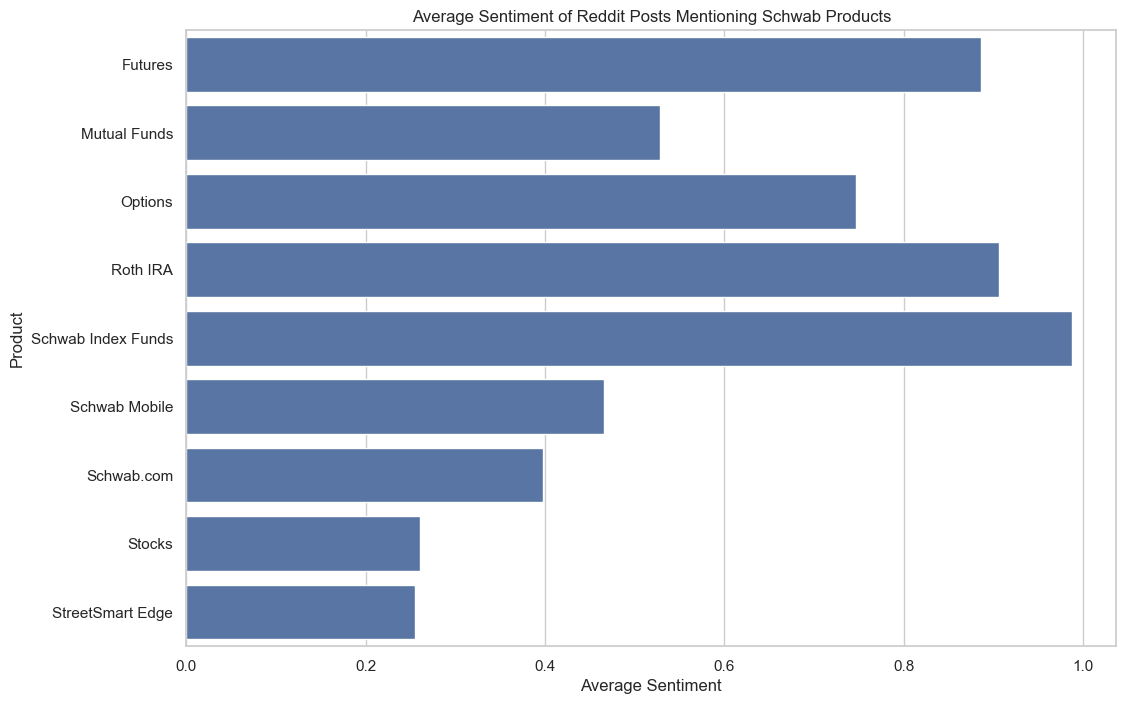

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='average_sentiment', y='product', data=product_sentiment)
ax.set_title('Average Sentiment of Reddit Posts Mentioning Schwab Products')
ax.set_xlabel('Average Sentiment')
ax.set_ylabel('Product')
plt.show()

